In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('tic-tac-toe.data', header = None)
df.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'outcome']
df.head()

,one,two,three,four,five,six,seven,eight,nine,outcome
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [77]:
# test with drop first = true
X = df

encoded = pd.get_dummies(df.one, prefix = 'one', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('one', axis = 1, inplace=True)

encoded = pd.get_dummies(df['two'], prefix = 'two', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('two', axis = 1, inplace=True)

encoded = pd.get_dummies(df['three'], prefix = 'three', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('three', axis = 1, inplace=True)

encoded = pd.get_dummies(df['four'], prefix = 'four', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('four', axis = 1, inplace=True)

encoded = pd.get_dummies(df['five'], prefix = 'five', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('five', axis = 1, inplace=True)

encoded = pd.get_dummies(df['six'], prefix = 'six', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('six', axis = 1, inplace=True)

encoded = pd.get_dummies(df['seven'], prefix = 'seven', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('seven', axis = 1, inplace=True)

encoded = pd.get_dummies(df['eight'], prefix = 'eight', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('eight', axis = 1, inplace=True)

encoded = pd.get_dummies(df['nine'], prefix = 'nine', drop_first = 'True').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('nine', axis = 1, inplace=True)

encoded = pd.get_dummies(df['outcome'], prefix = 'outcome').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('outcome', axis = 1, inplace=True)
X.head()

,one_x,two_x,three_x,four_x,five_x,six_x,seven_x,eight_x,nine_x,outcome_positive
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,0,0,1
4,1,1,1,1,0,0,0,0,0,1


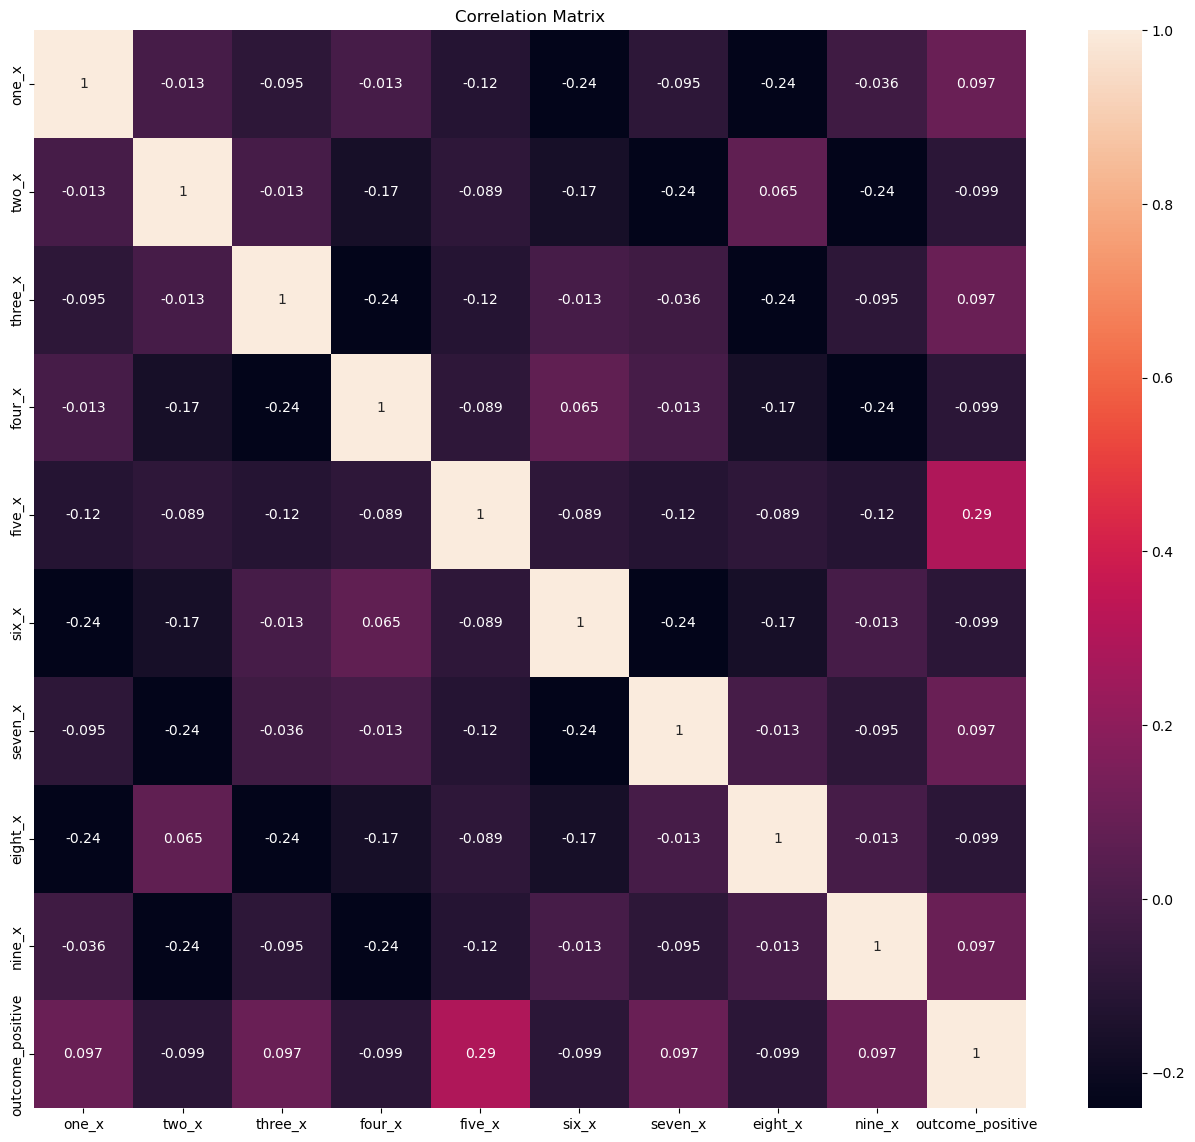

In [78]:
plt.figure(figsize=(16,14))

sns.heatmap(X.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

y = X[['outcome_positive']]
#X = X[['one_o', 'one_x', 'two_o', 'two_x', 'three_o', 'three_x', 'four_o','four_x', 'five_o','five_x', 'six_o','six_x','seven_o','seven_x', 'eight_o','eight_x', 'nine_o','nine_x']]
X = X[['one_x', 'two_x', 'three_x', 'four_x', 'five_x', 'six_x', 'seven_x', 'eight_x', 'nine_x']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the classifier to the data
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [81]:
import warnings
warnings.filterwarnings('ignore')
knn.score(X_test, y_test)


0.9401041666666666

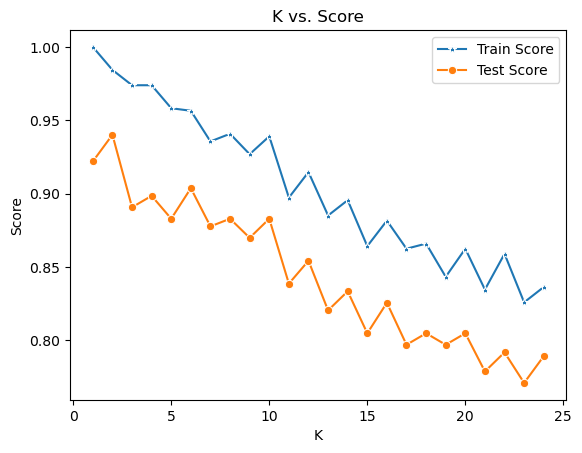

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-25
for i in range(1,25):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
sns.lineplot(x=range(1,25), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,25), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()


In [88]:
#cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.58854167 0.765625   0.93229167 0.79581152 0.81151832]
cv_scores mean:0.7787576352530541


In [84]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, refit=True,verbose=3, cv=5)

#fit model to data
knn_gscv.fit(X_train,y_train)
knn_gscv.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.948 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.904 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.930 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.939 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.930 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.939 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.930 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.974 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.948 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.930 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.913 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

[CV 1/5] END ....................n_neighbors=24;, score=0.774 total time=   0.0s
[CV 2/5] END ....................n_neighbors=24;, score=0.774 total time=   0.0s
[CV 3/5] END ....................n_neighbors=24;, score=0.817 total time=   0.0s
[CV 4/5] END ....................n_neighbors=24;, score=0.809 total time=   0.0s
[CV 5/5] END ....................n_neighbors=24;, score=0.789 total time=   0.0s


{'n_neighbors': 2}

In [85]:
knn_gscv.best_score_

0.9442257818459192

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn_gscv.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       138
           1       0.93      0.98      0.95       246

    accuracy                           0.94       384
   macro avg       0.95      0.92      0.93       384
weighted avg       0.94      0.94      0.94       384

[[119  19]
 [  4 242]]


In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print(classification_report(y_test,knn_gscv.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test,knn_gscv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       138
           1       0.93      0.98      0.95       246

    accuracy                           0.94       384
   macro avg       0.95      0.92      0.93       384
weighted avg       0.94      0.94      0.94       384

[[119  19]
 [  4 242]]
